In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "..", "data")
data_files = os.listdir(data_folder)
data_files

['colors.csv',
 'inventories.csv',
 'inventory_parts.csv',
 'inventory_sets.csv',
 'parts.csv',
 'part_categories.csv',
 'sets.csv',
 'themes.csv']

In [38]:
#setting up the path for each csv
sets_path = os.path.join(data_folder, "sets.csv")
parts_path = os.path.join(data_folder, "parts.csv")
part_categories_path =  os.path.join(data_folder, "part_categories.csv")
inventories_path = os.path.join(data_folder, "inventories.csv")
inventory_parts_path = os.path.join(data_folder, "inventory_parts.csv")

#Read the file as pd.
sets = pd.read_csv(sets_path)
parts = pd.read_csv(parts_path)
part_categories = pd.read_csv(part_categories_path)
inventories = pd.read_csv(inventories_path)
inventory_parts = pd.read_csv(inventory_parts_path)


In [39]:
# Find the 5 most common parts
part_counts = inventory_parts['part_num'].value_counts().head(5)
part_counts_df = part_counts.reset_index().rename(columns={'index': 'part_num', 'part_num': 'count'})

# Merge with the parts DataFrame to get the names
common_parts = part_counts_df.merge(parts, left_on='part_num', right_on='part_num')

# Select only the relevant columns to display
common_parts = common_parts[['part_num', 'name', 'count']]

print(common_parts)

  part_num                               name  count
0     6141  Plate Round 1 x 1 with Solid Stud  16550
1     3023                        Plate 1 x 2  10359
2     3004                        Brick 1 x 2   8634
3     3020                        Plate 2 x 4   7566
4     3022                        Plate 2 x 2   7052


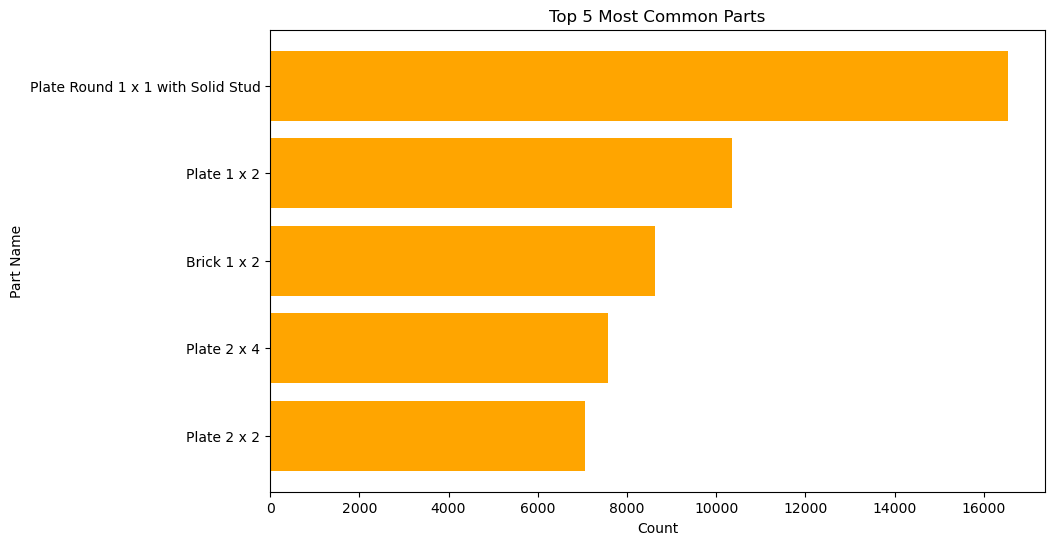

In [40]:
# Create a bar plot for the most common parts
plt.figure(figsize=(10, 6))
plt.barh(common_parts['name'], common_parts['count'], color='orange')
plt.xlabel('Count')
plt.ylabel('Part Name')
plt.title('Top 5 Most Common Parts')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


In [41]:
# Find the 5 rarest parts
rarest_part_counts = inventory_parts['part_num'].value_counts().tail(5)
rarest_part_counts_df = rarest_part_counts.reset_index().rename(columns={'index': 'part_num', 'part_num': 'count'})

# Merge with the parts DataFrame to get the names
rarest_parts = rarest_part_counts_df.merge(parts, left_on='part_num', right_on='part_num')

# Select only the relevant columns to display
rarest_parts = rarest_parts[['part_num', 'name', 'count']]

# Display the rarest parts data
print(rarest_parts)

      part_num                                               name  count
0     3754pb07              Brick 1 x 6 x 5 with Stone Wall Print      1
1  90638pr0010  Hero Factory Armor with Ball Joint Socket - Si...      1
2  90639pr0032  Hero Factory Armor with Ball Joint Socket - Si...      1
3        24666                       LEGO Puppy Dog with 1.5 Hole      1
4        20243  Sticker for Set 75090-2 - International Versio...      1


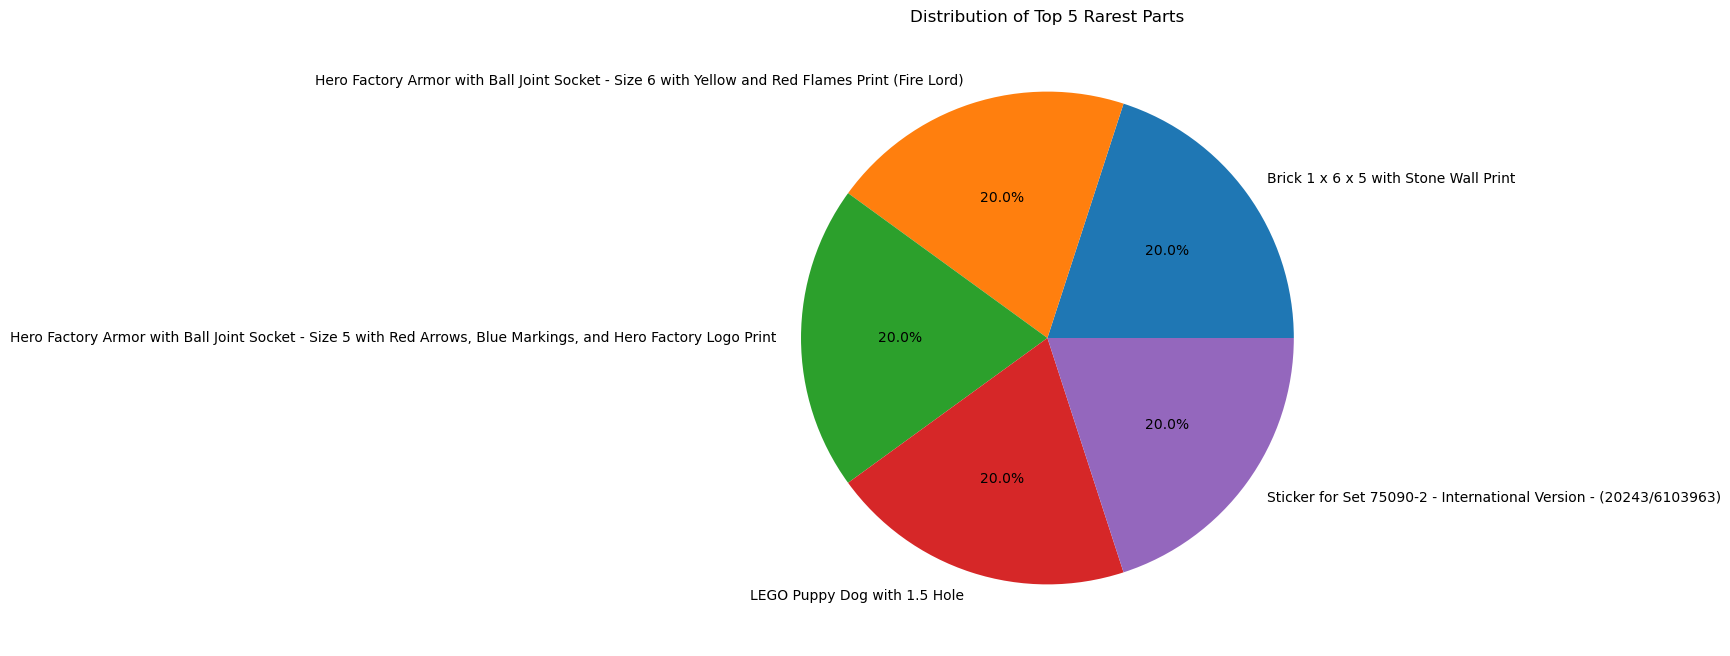

In [30]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rarest_parts['count'], labels=rarest_parts['name'], autopct='%1.1f%%')
plt.title('Distribution of Top 5 Rarest Parts')
plt.show()


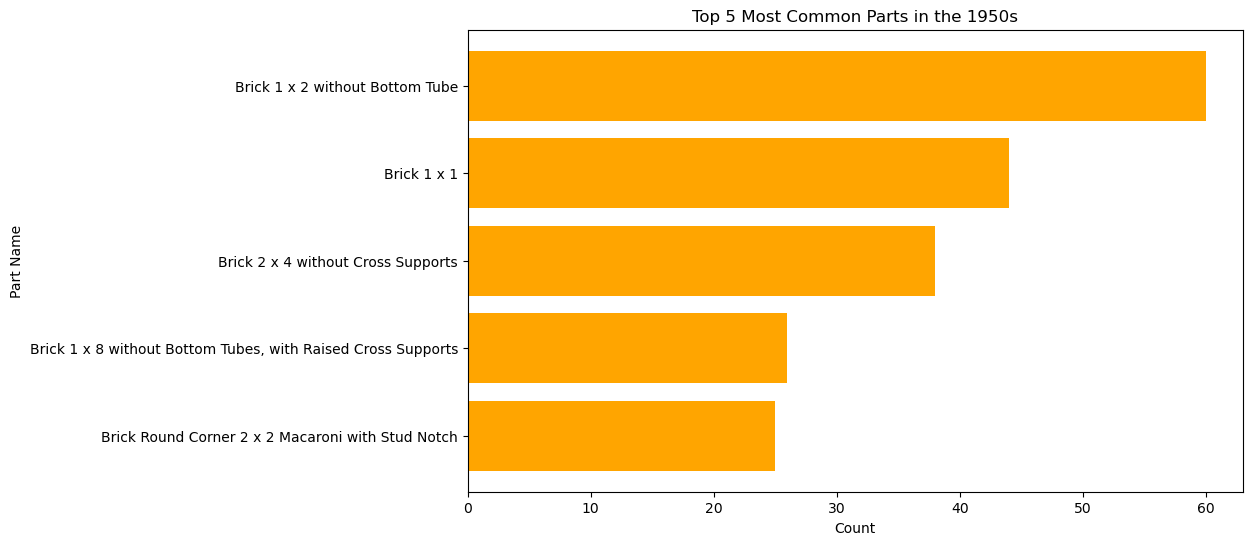

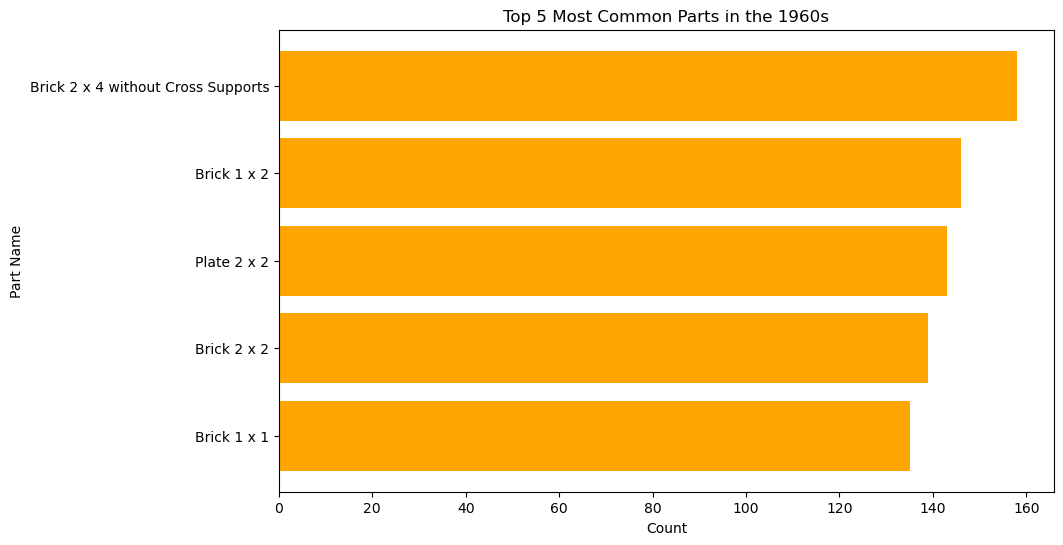

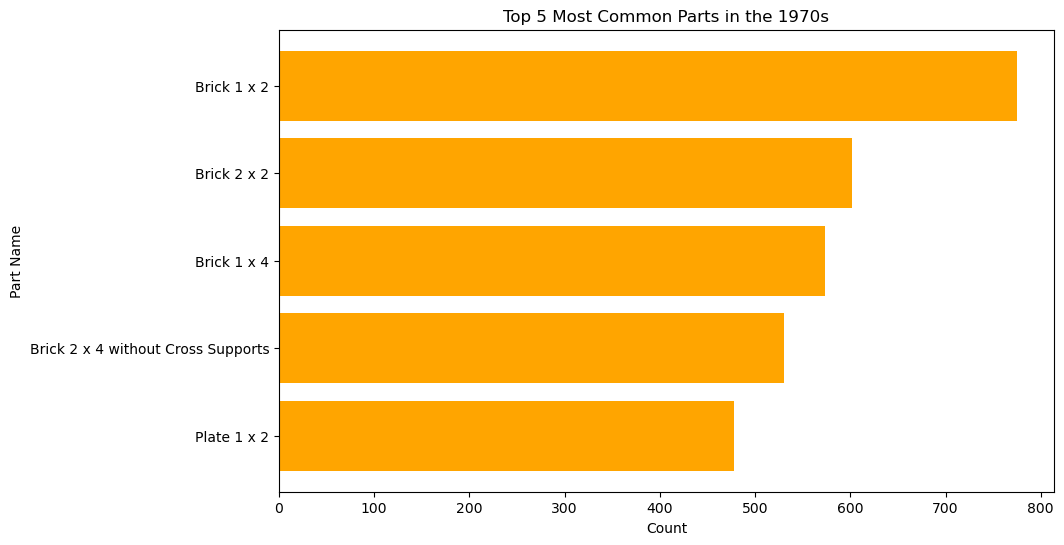

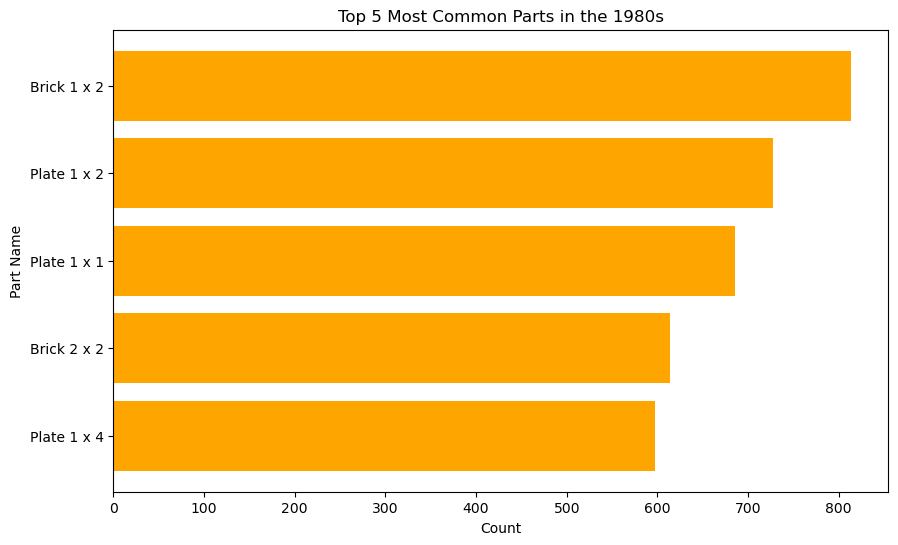

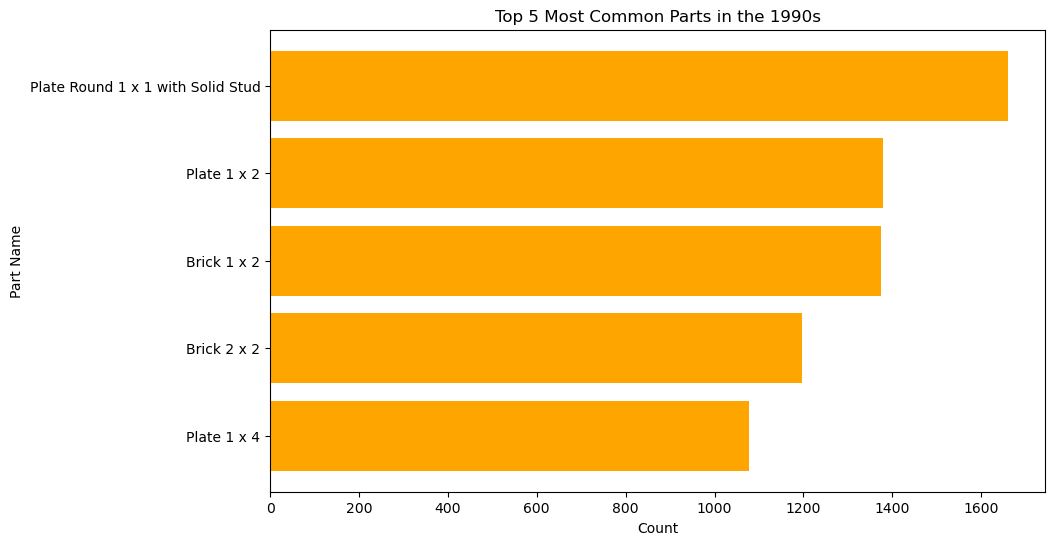

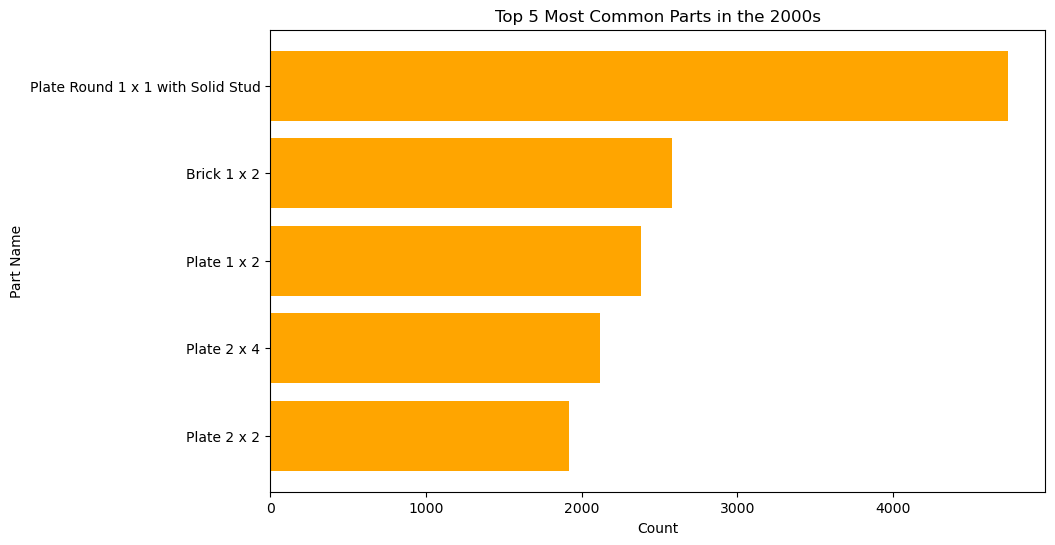

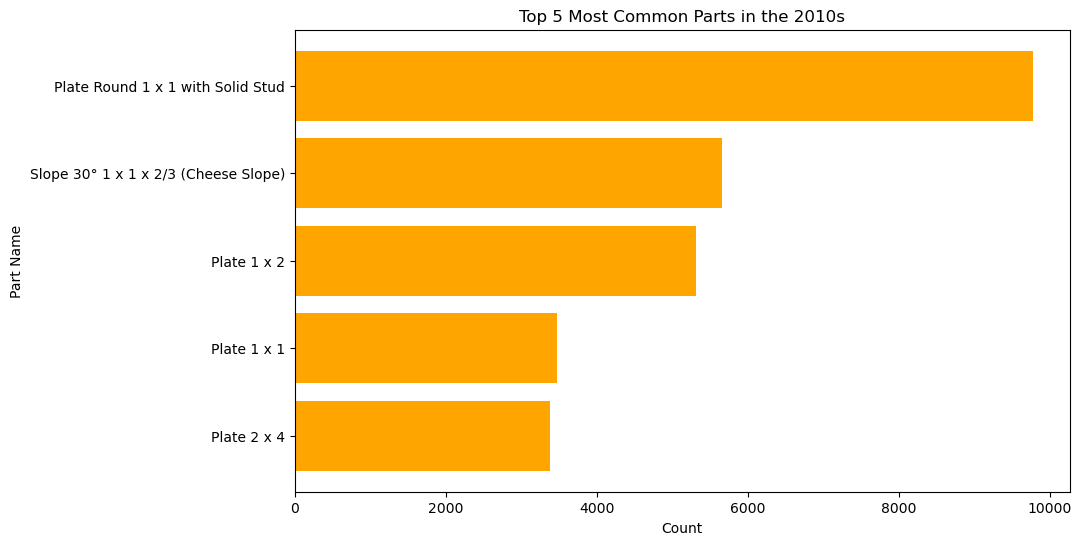

In [51]:
# Merge inventory_parts with inventories, then merge the result with sets to get the year
inventory_parts_inventories = pd.merge(inventory_parts, inventories, left_on='inventory_id', right_on='id')
merged_data = pd.merge(inventory_parts_inventories, sets, on='set_num')

# Define the function to convert year to decade
def year_to_decade(year):
    if year < 1960:
        return 1950
    elif year < 1970:
        return 1960
    elif year < 1980:
        return 1970
    elif year < 1990:
        return 1980
    elif year < 2000:
        return 1990
    elif year < 2010:
        return 2000
    else:
        return 2010

# Apply the year_to_decade function to create a decade column
merged_data['decade'] = merged_data['year'].apply(year_to_decade)

# Group by decade and part_num, then count occurrences
decade_part_counts = merged_data.groupby(['decade', 'part_num']).size().reset_index(name='count')

# Find the top 5 parts for each decade
top_parts_per_decade = decade_part_counts.groupby('decade').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Merge with parts DataFrame to get the names of the parts
top_parts_per_decade_with_names = top_parts_per_decade.merge(parts, on='part_num', how='left')

# Plotting per decade
for decade in top_parts_per_decade_with_names['decade'].unique():
    subset = top_parts_per_decade_with_names[top_parts_per_decade_with_names['decade'] == decade]
    plt.figure(figsize=(10, 6))
    plt.barh(subset['name'], subset['count'], color='orange')
    plt.xlabel('Count')
    plt.ylabel('Part Name')
    plt.title(f'Top 5 Most Common Parts in the {decade}s')
    plt.gca().invert_yaxis()
    plt.show()
